<a href="https://colab.research.google.com/github/galb4tosha/my-ml/blob/master/kaggle_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
import tensorflow
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle
! mkdir ~/.kaggle/
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c digit-recognizer
! unzip train.csv.zip -d train
! unzip test.csv.zip -d test

     |████████████████████████████████| 61kB 5.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=60a8f38736f07ddb704a003793c5b0c77f553e2ade55c917e990bde1b21a6d52
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
403 - Forbidden
unzip:  cannot find or open train.csv.zip, train.csv.zip.zip or train.csv.zip.ZIP.
unzip:  cannot find or open test.csv.zip, test.csv.zip.zip or test.csv.zip.ZIP.


In [ ]:
train_data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/mnist kaggle/train.csv", skiprows=1, delimiter=',')
test_data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/mnist kaggle/test.csv", skiprows=1, delimiter=',')

In [ ]:
x_train = train_data[:, 1:]
y_train = train_data[:,0]
x_test = test_data

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = utils.to_categorical(y_train,10)

In [ ]:
x_train = x_train.reshape(42000,28,28)
x_test = x_test.reshape(28000,28,28)

Just linear 0.98110 

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim=784, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
# stop_callback = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
model_save_path = 'best_linear_model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path, 
                              monitor='val_accuracy', 
                              save_best_only=True,
                              verbose=1)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=64, callbacks=[checkpoint_callback])

Epoch 1/50
525/525 [==============================] - 5s 4ms/step - loss: 0.2596 - accuracy: 0.9226 - val_loss: 0.1498 - val_accuracy: 0.9543

Epoch 00001: val_accuracy improved from -inf to 0.95429, saving model to best_linear_model.h5
Epoch 2/50
525/525 [==============================] - 2s 4ms/step - loss: 0.1038 - accuracy: 0.9701 - val_loss: 0.1026 - val_accuracy: 0.9680

Epoch 00002: val_accuracy improved from 0.95429 to 0.96798, saving model to best_linear_model.h5
Epoch 3/50
525/525 [==============================] - 2s 4ms/step - loss: 0.0641 - accuracy: 0.9800 - val_loss: 0.0808 - val_accuracy: 0.9765

Epoch 00003: val_accuracy improved from 0.96798 to 0.97655, saving model to best_linear_model.h5
Epoch 4/50
525/525 [==============================] - 2s 4ms/step - loss: 0.0411 - accuracy: 0.9867 - val_loss: 0.0869 - val_accuracy: 0.9733

Epoch 00004: val_accuracy did not improve from 0.97655
Epoch 5/50
525/525 [==============================] - 2s 4ms/step - loss: 0.0285 - ac

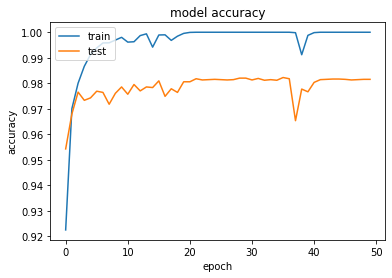

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

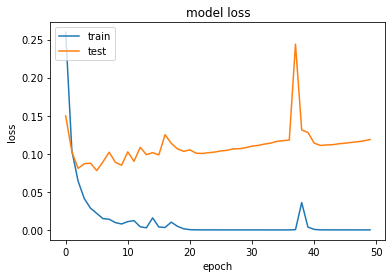

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
best_linear_model = load_model('best_linear_model.h5')

In [ ]:
test_predicts = best_linear_model.predict(x_test)
y_test = np.array([np.argmax(pred) for pred in test_predicts])

In [ ]:
submission_array = np.array([[i+1, y_test[i]]for i in range(28000)])

In [ ]:
np.savetxt('submission_linear.csv', submission_array, delimiter=',', header="ImageId,Label", fmt='%d', comments='')

In [ ]:
! kaggle competitions submit -c digit-recognizer -f submission_linear.csv -m "Message"

100% 208k/208k [00:02<00:00, 89.9kB/s]
Successfully submitted to Digit Recognizer

Easy cnn 0.98875

In [ ]:
x_train = x_train.reshape(42000,28,28)
x_test = x_test.reshape(28000,28,28)
x_train = tensorflow.expand_dims(x_train, axis=-1)
x_test = tensorflow.expand_dims(x_test, axis=-1)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3, activation='relu',padding='same', input_shape=(28, 28,1)))
model.add(Conv2D(32,3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 813,802
Trainable params: 813,802
Non-trainable params: 0
________________________________________________

In [ ]:
model_save_path = 'best_cnn_model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path, 
                              monitor='val_accuracy', 
                              save_best_only=True,
                              verbose=1)

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.2, callbacks=[checkpoint_callback], epochs=50, batch_size=64)

Epoch 1/50
525/525 [==============================] - 3s 5ms/step - loss: 0.1937 - accuracy: 0.9408 - val_loss: 0.0812 - val_accuracy: 0.9752

Epoch 00001: val_accuracy improved from -inf to 0.97524, saving model to best_cnn_model.h5
Epoch 2/50
525/525 [==============================] - 2s 5ms/step - loss: 0.0552 - accuracy: 0.9834 - val_loss: 0.0683 - val_accuracy: 0.9777

Epoch 00002: val_accuracy improved from 0.97524 to 0.97774, saving model to best_cnn_model.h5
Epoch 3/50
525/525 [==============================] - 2s 5ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0497 - val_accuracy: 0.9848

Epoch 00003: val_accuracy improved from 0.97774 to 0.98476, saving model to best_cnn_model.h5
Epoch 4/50
525/525 [==============================] - 2s 5ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0476 - val_accuracy: 0.9867

Epoch 00004: val_accuracy improved from 0.98476 to 0.98667, saving model to best_cnn_model.h5
Epoch 5/50
525/525 [==============================] - 2

In [ ]:
best_cnn_model = load_model('best_cnn_model.h5')
test_predicts = best_cnn_model.predict(x_test)
y_test = np.array([np.argmax(pred) for pred in test_predicts])
submission_array = np.array([[i+1, y_test[i]]for i in range(28000)])
np.savetxt('submission_cnn.csv', submission_array, delimiter=',', header="ImageId,Label", fmt='%d', comments='')
! kaggle competitions submit -c digit-recognizer -f submission_cnn.csv -m "Message"

100% 208k/208k [00:00<00:00, 513kB/s]
Successfully submitted to Digit Recognizer

nets

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
x_train = x_train.reshape(42000,28,28)
x_test = x_test.reshape(28000,28,28)
# x_train = tensorflow.expand_dims(x_train, axis=-1)
# x_test = tensorflow.expand_dims(x_test, axis=-1)

Resnet 50 - 0.99221

In [ ]:
x_train_rgb = np.repeat(x_train[..., np.newaxis], 3, -1)
x_train_resnet_rgb = np.array([cv2.resize(img, (32,32)) for img in x_train_rgb])

In [ ]:
x_test_rgb = np.repeat(x_test[..., np.newaxis], 3, -1)
x_test_resnet_rgb = np.array([cv2.resize(img, (32,32)) for img in x_test_rgb])

In [ ]:
base_model = ResNet50(input_shape=(32,32,3),
                      include_top=False)
# base_model.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model_save_path = 'best_resnet_model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path, 
                              monitor='val_accuracy', 
                              save_best_only=True,
                              verbose=1)

In [ ]:
history = model.fit(x_train_resnet_rgb, 
                    y_train, 
                    validation_split=0.2, 
                    callbacks=[checkpoint_callback], 
                    epochs=100, 
                    batch_size=64)

Epoch 1/100
525/525 [==============================] - 34s 53ms/step - loss: 0.2380 - accuracy: 0.9477 - val_loss: 5.1074 - val_accuracy: 0.1131

Epoch 00001: val_accuracy improved from -inf to 0.11310, saving model to best_resnet_model.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
525/525 [==============================] - 28s 53ms/step - loss: 0.0726 - accuracy: 0.9812 - val_loss: 0.0701 - val_accuracy: 0.9824

Epoch 00002: val_accuracy improved from 0.11310 to 0.98238, saving model to best_resnet_model.h5
Epoch 3/100
525/525 [==============================] - 27s 51ms/step - loss: 0.0626 - accuracy: 0.9841 - val_loss: 0.1210 - val_accuracy: 0.9663

Epoch 00003: val_accuracy did not improve from 0.98238
Epoch 4/100
525/525 [==============================] - 27s 52ms/step - loss: 0.0478 - accuracy: 0.9870 - val_loss: 0.0421 - val_accuracy: 0.9887

Epoch 00004: val_accuracy improved from 0.98238 to 0.98869, saving model to best_resnet_model.h5
Epoch 5/100
525/525 [==============================] - 28s 53ms/step - loss: 0.0424 - accuracy: 0.9886 - val_loss: 0.0730 - val_accuracy: 0.9830

Epoch 00005: val_accuracy did not improve from 0.98869
Epoch 6/100
525/525 [==============================] - 28s 54ms/step - loss: 0.0342 - accuracy: 0.9903 - val_los

In [ ]:
best_cnn_model = load_model('best_resnet_model.h5')
test_predicts = best_cnn_model.predict(x_test_resnet_rgb)
y_test = np.array([np.argmax(pred) for pred in test_predicts])
submission_array = np.array([[i+1, y_test[i]]for i in range(28000)])
np.savetxt('submission_cnn.csv', submission_array, delimiter=',', header="ImageId,Label", fmt='%d', comments='')
! kaggle competitions submit -c digit-recognizer -f submission_cnn.csv -m "Message"

100% 208k/208k [00:00<00:00, 581kB/s]
Successfully submitted to Digit Recognizer

mobilenet v2 - 0.98985

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
base_model = MobileNetV2(input_shape=(32,32,3),
                      include_top=False)

In [ ]:
model_save_path = 'best_mobilenetv2_model.h5'
checkpoint_mobnet_callback = ModelCheckpoint(model_save_path, 
                              monitor='val_accuracy', 
                              save_best_only=True,
                              verbose=1)

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 2,236,682
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
history = model.fit(x_train_resnet_rgb, 
                    y_train, 
                    validation_split=0.2, 
                    callbacks=[checkpoint_mobnet_callback], 
                    epochs=100, 
                    batch_size=64)

In [ ]:
best_cnn_model = load_model('/content/drive/MyDrive/Colab Notebooks/best_res_model.h5')
test_predicts = best_cnn_model.predict(x_test)
y_test = np.array([np.argmax(pred) for pred in test_predicts])
submission_array = np.array([[i+1, y_test[i]]for i in range(28000)])
np.savetxt('submission_cnn.csv', submission_array, delimiter=',', header="ImageId,Label", fmt='%d', comments='')

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! kaggle competitions submit -c digit-recognizer -f submission_cnn.csv -m "Message"

100% 208k/208k [00:03<00:00, 60.6kB/s]
Successfully submitted to Digit Recognizer

ResNet 101 - 0.98985

In [ ]:
from tensorflow.keras.applications import ResNet101V2

In [ ]:
base_model = ResNet101V2(input_shape=(32,32,3),
                      include_top=False)

171319296/171317808 [==============================] - 1s 0us/step


In [ ]:
x_train = np.repeat(x_train[..., np.newaxis], 3, -1)
# print(x_train_rgb.shape)
x_train = np.array([cv2.resize(img, (32,32)) for img in x_train])

In [ ]:
x_test = np.repeat(x_test[..., np.newaxis], 3, -1)
x_test = np.array([cv2.resize(img, (32,32)) for img in x_test])

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 1, 1, 2048)        42626560  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 42,647,050
Trainable params: 42,549,386
Non-trainable params: 97,664
_________________________________________________________________


In [ ]:
model_save_path = '/content/drive/MyDrive/Colab Notebooks/best_res_model.h5'
checkpoint_mobnet_callback = ModelCheckpoint(model_save_path, 
                              monitor='val_accuracy', 
                              save_best_only=True,
                              verbose=1)

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    validation_split=0.2, 
                    callbacks=[checkpoint_mobnet_callback], 
                    epochs=100, 
                    batch_size=64)

Epoch 1/100
525/525 [==============================] - 94s 102ms/step - loss: 0.5163 - accuracy: 0.8611 - val_loss: 0.0752 - val_accuracy: 0.9833

Epoch 00001: val_accuracy improved from -inf to 0.98333, saving model to /content/drive/MyDrive/Colab Notebooks/best_res_model.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
525/525 [==============================] - 52s 99ms/step - loss: 0.1379 - accuracy: 0.9721 - val_loss: 23057.3906 - val_accuracy: 0.1014

Epoch 00002: val_accuracy did not improve from 0.98333
Epoch 3/100
525/525 [==============================] - 50s 95ms/step - loss: 0.3064 - accuracy: 0.9457 - val_loss: 0.1155 - val_accuracy: 0.9702

Epoch 00003: val_accuracy did not improve from 0.98333
Epoch 4/100
525/525 [==============================] - 50s 94ms/step - loss: 0.1328 - accuracy: 0.9752 - val_loss: 0.0519 - val_accuracy: 0.9860

Epoch 00004: val_accuracy improved from 0.98333 to 0.98595, saving model to /content/drive/MyDrive/Colab Notebooks/best_res_model.h5
Epoch 5/100
525/525 [==============================] - 51s 98ms/step - loss: 0.0903 - accuracy: 0.9832 - val_loss: 0.2028 - val_accuracy: 0.9804

Epoch 00005: val_accuracy did not improve from 0.98595
Epoch 6/100
525/525 [==============================] - 52s 99ms/step - loss: 0.3100 - accuracy: 0.9393 - val_loss:

A lot of CNN layers - 0.99114

In [ ]:
x_train = tensorflow.expand_dims(x_train, axis=-1)
x_test = tensorflow.expand_dims(x_test, axis=-1)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28,1)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 512)         1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 512)         0

In [ ]:
model_save_path = '/content/drive/MyDrive/Colab Notebooks/best_res_model.h5'
checkpoint_mobnet_callback = ModelCheckpoint(model_save_path, 
                              monitor='val_accuracy', 
                              save_best_only=True,
                              verbose=1)

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    validation_split=0.2, 
                    callbacks=[checkpoint_mobnet_callback], 
                    epochs=100, 
                    batch_size=64)

Epoch 1/100
525/525 [==============================] - 38s 13ms/step - loss: 0.1972 - accuracy: 0.9387 - val_loss: 0.1020 - val_accuracy: 0.9687

Epoch 00001: val_accuracy improved from -inf to 0.96869, saving model to /content/drive/MyDrive/Colab Notebooks/best_res_model.h5
Epoch 2/100
525/525 [==============================] - 7s 12ms/step - loss: 0.0530 - accuracy: 0.9832 - val_loss: 0.0526 - val_accuracy: 0.9846

Epoch 00002: val_accuracy improved from 0.96869 to 0.98464, saving model to /content/drive/MyDrive/Colab Notebooks/best_res_model.h5
Epoch 3/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0420 - val_accuracy: 0.9888

Epoch 00003: val_accuracy improved from 0.98464 to 0.98881, saving model to /content/drive/MyDrive/Colab Notebooks/best_res_model.h5
Epoch 4/100
525/525 [==============================] - 7s 13ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0570 - val_accuracy: 0.9849

Epoch 00004: val_accura

In [ ]:
best_cnn_model = load_model('/content/drive/MyDrive/Colab Notebooks/best_res_model.h5')
test_predicts = best_cnn_model.predict(x_test)
y_test = np.array([np.argmax(pred) for pred in test_predicts])
submission_array = np.array([[i+1, y_test[i]]for i in range(28000)])
np.savetxt('submission_cnn.csv', submission_array, delimiter=',', header="ImageId,Label", fmt='%d', comments='')